**<span style="font-family:KerkisSans; font-size:2em;">Practical Data Science</span>**

**<span style="font-family:KerkisSans; font-size:2em;">Assignment IΙ</span>**

<span style="font-family:KerkisSans; font-size:2em; color: black">M.Sc. Data Science | </span>
<span style="font-family:KerkisSans; font-size:2em; color: black">2020-2021</span>

<span style="font-family:KerkisSans; font-size:1.5em; color: black">Ioannis Karampinis</span>

# Task I: Exploratory Analysis for COVID19 [3 pts]

You are asked to re-produce the exploratory analysis performed by [Brinati et al. (2020)](https://zenodo.org/record/3886927#.X7Jy_ZMzbm1), attempting to detect COVID19 (SWAB) based on features such as gender, age, blood exams, etc. 

### A.
1. Download the dataset and load it into a dataframe.
2. Reproduce Table 2 of the paper. 
  * How many empty values are included per column? 
  * Report the percentage and the absolute number per column. 
  * Did you find any inconsistency between the numbers you report and those in the paper?

In [1]:
### ===== Packages imports ===== ###
### ---------------------------- ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For centering plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# Read the data
data = pd.read_excel('covid_study_v2.xlsx')

In [3]:
# Print a sample of the data
data.sample(5)

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
80,M,51,8.3,128.0,6.8,1,0.5,0.0,0.0,121.7,126.0,119.0,322.0,322.0,529.0,1
192,F,87,10.4,180.0,NaN,NaN,NaN,NaN,NaN,3.2,24.0,15.0,NaN,NaN,NaN,0
253,F,39,4.2,185.0,NaN,NaN,NaN,NaN,NaN,4.3,19.0,16.0,NaN,NaN,168.0,0
18,M,41,6.6,157.0,5.3,1,0.3,0.0,0.0,40.6,71.0,85.0,NaN,NaN,NaN,1
231,M,91,7.4,223.0,NaN,NaN,NaN,NaN,NaN,15.0,29.0,28.0,NaN,NaN,NaN,0


In [4]:
### ===== Number of NaN's per column ===== ###
### -------------------------------------- ###
num_nulls = data.isna().apply(sum, axis=0)  # Number of NaN's per column
nulls = pd.concat([ num_nulls,(100*num_nulls/(len(data))).round(2) ],axis=1) # % of NaN's rounded to 2 digits
nulls.rename(columns={0:'# of missing values',1:'$\%$ of missing values'}, inplace=True)
# Display the results with centered columns
format_dict = {'$\%$ of missing values': '{:.2f}'}
display(nulls.style.set_table_styles([dict(selector='td', props=[('text-align', 'center')])]).format(format_dict))

,# of missing values,$\%$ of missing values
GENDER,0,0.00
AGE,0,0.00
WBC,2,0.72
Platelets,2,0.72
Neutrophils,70,25.09
Lymphocytes,70,25.09
Monocytes,70,25.09
Eosinophils,70,25.09
Basophils,71,25.45
CRP,6,2.15


We notice a discrepancy between the number we obtain and the ones presented in the paper, where the authors have completely ignored the variable ALP in their table.

### B. 
 Binarise the "GENDER" column (only 0s and 1s should be included). 


In [5]:
col_names = data.columns  # Get the columns names in their original order
# obtain the binarized variable, keeping only only the first column. This results in the binarized
# variable called 'GENDER_M' to be 1 for male and 0 for female. We rename it to 'GENDER', keeping in mind 
# the original name. We then get the columns in the correct order.
data = pd.get_dummies(data, columns=['GENDER'], drop_first=True).rename(columns={'GENDER_M':'GENDER'})
data = data[col_names]
# Finally, we rename the first column to 'MALE', indicating that 1 corresponds to male and 0 to female
data.rename(columns={'GENDER':'MALE'}, inplace=True)
data.sample(5)

,MALE,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
8,1,75,11.6,123.0,10.0,0.8,0.7,0.0,0.0,244.6,53.0,37.0,43.0,27.0,439.0,1
118,1,48,8.5,204.0,7.4,0.4,0.7,0.0,0.0,194.7,31.0,18.0,NaN,NaN,321.0,1
186,0,72,10.1,245.0,NaN,NaN,NaN,NaN,NaN,49.6,28.0,22.0,NaN,NaN,328.0,0
94,1,40,5.2,186.0,4.0,0.7,0.5,0.0,0.0,98.7,50.0,56.0,59.0,81.0,324.0,1
238,1,77,10.7,199.0,9.6,0.5,0.4,0.1,0.0,181.5,32.0,18.0,NaN,NaN,199.0,0


### C.

 Detect and replace any non-empty yet invalid values in all the columns (e.g., a non-integer in a column of integers).

First, define the correct value types for each column. For GENDER , after binarization this is string an integer 0 or 1. For AGE and SWAB, it is also integer (SWAB is binary 0-1). For everyhting else, a float.

In [6]:
types = {key: float for key in range(2,15)}
types.update({0:int, 15:int, 1:int})


Find the incorrect values per column, that don't match the prescribed type. Note that NaN's are accounted for as 'the correct type'.

In [7]:
col_names = data.columns
for iColumn in range(16):
    name = col_names[iColumn]
    result = data.loc[:, name].apply(lambda x: type(x)==types[iColumn]    ).sum()
    print('Number of incorrect entries in {}: {}'.format(name, 279-result))

Number of incorrect entries in MALE: 0
Number of incorrect entries in AGE: 0
Number of incorrect entries in WBC: 0
Number of incorrect entries in Platelets: 0
Number of incorrect entries in Neutrophils: 0
Number of incorrect entries in Lymphocytes: 27
Number of incorrect entries in Monocytes: 0
Number of incorrect entries in Eosinophils: 0
Number of incorrect entries in Basophils: 0
Number of incorrect entries in CRP: 0
Number of incorrect entries in AST: 0
Number of incorrect entries in ALT: 0
Number of incorrect entries in ALP: 0
Number of incorrect entries in GGT: 0
Number of incorrect entries in LDH: 0
Number of incorrect entries in SWAB: 0


We focus on Lymphocytes. We find those rows where we dont have the correct type.

In [8]:
wrong_types = np.where(data.Lymphocytes.apply(lambda x: type(x)!=float))
wrong_types

(array([ 16,  18,  20,  44,  45,  53,  56,  79,  80,  82,  90,  92, 119,
        129, 144, 145, 148, 153, 159, 161, 194, 213, 243, 251, 254, 264,
        270], dtype=int64),)

We inspect them

In [9]:
data.Lymphocytes.loc[wrong_types]

16       1
18       1
20       1
44       1
45       1
53     0-4
56       1
79       1
80       1
82       1
90       1
92       1
119      2
129      1
144      1
145      1
148      1
153      2
159      2
161      1
194      1
213      1
243      1
251      1
254      1
264      1
270      3
Name: Lymphocytes, dtype: object

Most of the values that deviate from the expected 'float' type are integers. One has been inserted as '0-4'. This is an oversight, and the true value will be taken as 0.4. We will manually deal with this first, before dealing with all the rest together.

In [10]:
data.loc[53, 'Lymphocytes']=0.4  # Manually changing the value
data.loc[:, 'Lymphocytes'].apply(float)  # Updating the rest of the values to be cast as floats.

0      0.8
1      0.9
2      NaN
3      1.2
4      NaN
      ... 
274    NaN
275    NaN
276    NaN
277    2.3
278    2.1
Name: Lymphocytes, Length: 279, dtype: float64

### D.

1. Plot a correlation heatmap that is better than the one used in the [article](https://zenodo.org/record/3886927#.X7Jy_ZMzbm1). 
2. Explain how is your heatmap better.

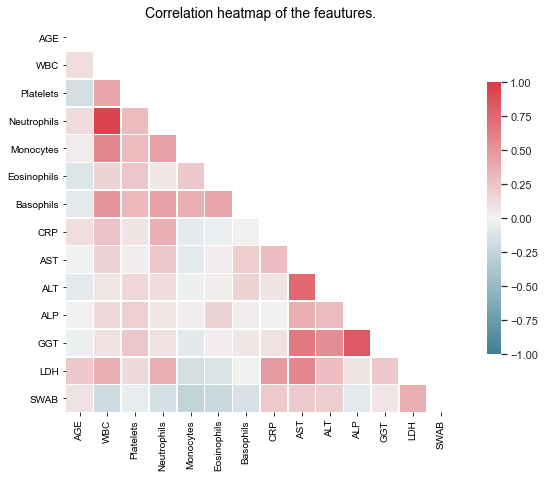

In [11]:
corr = data.loc[:, col_names[1:]].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=0)] = True

# Set up the matplotlib figure
fig1 = plt.figure(figsize=(10, 6))
axes1 = fig1.add_axes([0.1, 0.1, 0.9, 0.9])
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(palette='deep', color_codes=True) # use the seaborn "deep" colour palette


fig_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .7})
fig_plot.set_xticklabels(labels=fig_plot.get_xticklabels(), rotation=90)
axes1.set_title('Correlation heatmap of the feautures.', fontsize=14)
plt.show()



The above heatmap, in our opinion, is superior to the one presented in the paper. We support this claim based on two observations.
<p style='text-align: justify;'>   
$\bullet$First, the choice of colouring in their presentation does not support the authors' intended message. Colours are lighter towards the extreme values of the colorbar and very dark (black) for correlations close to 0. This falsely assigns more weight, optically (through shading), to small correlations, which obviously wasn't the intended message. </p>

<p style='text-align: justify;'>  
$\bullet$ Second, they haven't manually adjusted the limits of their colour bar, opting for the default values. This results in an assymetrical range of values in their colorbar, from approximately -0.25 to +1. Optically, this assigns approximately the same weight to correlations of the order of +1 and correlations of the order of -0.25, which, again, was not the intended behaviour.
</p>

<p style='text-align: justify;'> 
Our heatmpap, on the other hand, though it employs a fairly standard palette, avoids these pitfalls. We have used a so-called "diverging" palette, which assigns lighter shades to smaller values and darker shades to greater values. This gives optically the intended message. Also, we have correctly set the limits of the bar to be symmetric around 0. And indeed, we can see the result of this latter adjustment, since, by visually inspecting the heatmap, we notice the ("WBC", "Neutrophils") correlation to be almost 1, but there is no corresponding high negative correlation.
</p>

### E.
Fill in the empty cells per column, by using such a value that will not affect the variance of that column. 

We will use a modified version of $\href{https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_online_algorithm}{\text{Welford's algorithm}}$ to find a general formula for the value $x^*$ that corresponds to each column. For the generic column, assume that we have $k\neq 0$ missing values and $n$ values $x_i,\ i=1,2,...,n$, already filled. Obviously, $n+k=279$. We will fill this column with $k$ values equal to $x^*$. We can then write
\begin{gather}
s_n^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i-\bar{x}_n)^2,\\
s_{n+k}^2 = \frac{1}{n+k-1}\sum_{i=1}^{n+k} (x_i-\bar{x}_{n+k})^2,
\end{gather}

where $\bar{x}_{n},\ \bar{x}_{n+k}$ are the means for the initial and updated columns respectively. First, note that

\begin{equation}
\bar{x}_{n+k} = \frac{n\bar{x}_n+kx^*}{n+k} = \bar{x}_n + \frac{k}{n+k}(x^*-\bar{x}_n)
\end{equation}

Now, use the formula for $s_{n+k}^2$ to write

\begin{equation}
s_{n+k}^2 = \frac{1}{n+k-1}\sum_{i=1}^{n+k} (x_i-\bar{x}_{n+k})^2=\frac{1}{n+k-1}\left[\sum_{i=1}^{n} (x_i-\bar{x}_{n+k})^2 + \sum_{i=n+1}^{n+k} (x^*-\bar{x}_{n+k})^2\right] \\
\end{equation}

We focus on the 2 sums individually. First, we have

\begin{align}
\sum_{i=1}^{n} (x_i-\bar{x}_{n+k})^2 &= \sum_{i=1}^{n} \left[x_i-\left(\bar{x}_n + \frac{k}{n+k}(x^*-\bar{x}_n)\right)   \right]^2\\
&=\sum_{i=1}^{n} \left[(x_i-\bar{x}_n)  -\frac{k}{n+k}(x^*-\bar{x}_n)  \right]^2\\
&=\sum_{i=1}^{n}\left[ (x_i-\bar{x}_n)^2 -2(x_i-\bar{x}_n) \frac{k}{n+k}(x^*-\bar{x}_n) +   \frac{k^2}{(n+k)^2}(x^*-\bar{x}_n)^2             \right]\\
&=(n-1)s_n^2 -2\frac{k}{n+k}(x^*-\bar{x}_n)\sum_{i=1}^{n}(x_i-\bar{x}_n) + \frac{nk^2}{(n+k)^2}(x^*-\bar{x}_n)^2\\
&=(n-1)s_n^2 + \frac{nk^2}{(n+k)^2}(x^*-\bar{x}_n)^2,
\end{align}

where in the last equality the definition of $\bar{x}_n$ was employed. Similarly, we have

\begin{align}
\sum_{i=n+1}^{n+k} (x^*-\bar{x}_{n+k})^2&=\sum_{i=n+1}^{n+k}\left[x^*-\left(\bar{x}_n + \frac{k}{n+k}(x^*-\bar{x}_n)\right)\right]^2\\
&=\sum_{i=n+1}^{n+k}\left[ \frac{n}{n+k}(x^*-\bar{x}_n)  \right]^2 = \frac{kn^2}{(n+k)^2}(x^*-\bar{x}_n)^2.
\end{align}

Summing up, we have

\begin{align}
s_{n+k}^2 &= \frac{1}{n+k-1}\left[(n-1)s_n^2 + \frac{nk^2}{(n+k)^2}(x^*-\bar{x}_n)^2  +   \frac{kn^2}{(n+k)^2}(x^*-\bar{x}_n)^2\right]\\
&=\frac{n-1}{n+k-1}s_n^2 + \frac{nk}{(n+k-1)(n+k)}(x^*-\bar{x}_n)^2
\end{align}

We want to find $x^*$ such that $s_{n+k}^2=s_{n}^2$, i.e. we want to solve 

\begin{equation}
s_{n}^2=\frac{n-1}{n+k-1}s_n^2 + \frac{nk}{(n+k-1)(n+k)}(x^*-\bar{x}_n)^2
\end{equation}

To simplify the notation, set

\begin{gather}
c=\frac{k}{n+k-1}s_n^2, \quad \lambda=\frac{nk}{(n+k-1)(n+k)}
\end{gather}

Then, the equation we need to solve becomes

\begin{gather}
\lambda(x^*-\bar{x}_n)^2=c \Leftrightarrow (x^*-\bar{x}_n)^2 =\frac{n+k}{n}s_n^2   \Leftrightarrow x^* = \bar{x}_n \ \pm s_n\sqrt{\frac{n+k}{n}},
\end{gather}

where we have made use of the fact that $k\neq 0 \Leftrightarrow \lambda \neq 0$. We will use this final formula to compute the required value. The formula yields two values. We can choose either of them, mathematically, but physically it makes sense to use the positive one. If both are postive, choose the smallest.

In [12]:
def find_val(column):
    k = column.isna().sum()             # the number of missing values to fill
    n = 279-k                           # the number of non-missing values        
    mu = column.mean()                  # the mean of the column, as is
    s_n = np.sqrt(column.var())         # the standard deviation of the column, as is
    return (mu - s_n*np.sqrt(279/n), mu + s_n*np.sqrt(279/n)) 

In [13]:
col_names = data.columns     # Names of the columns
values_fill = np.zeros(13)   
for iColumn in range(2,15):
    name = col_names[iColumn]
    vals = find_val(data.loc[:, name ])  # Call the algorithm to get the values and select one based on sign.
    if vals[0]>=0:
        position = '1st'
        values_fill[iColumn-2] = vals[0]
    else:
        position = '2nd'
        values_fill[iColumn-2] = vals[1]
    print("For the column {} the values are {}. The {} one is selected" .format(name , vals, position))

For the column WBC the values are (3.6802184190101377, 13.425918765105383). The 1st one is selected
For the column Platelets the values are (124.99335952900798, 328.07090039878983). The 1st one is selected
For the column Neutrophils the values are (1.3795161391807467, 11.021440798618297). The 1st one is selected
For the column Lymphocytes the values are (0.2511382971452726, 2.1144119420891765). The 1st one is selected
For the column Monocytes the values are (0.1319750506581605, 1.0795082029303562). The 1st one is selected
For the column Eosinophils the values are (-0.09776165673797826, 0.20780950362793044). The 2nd one is selected
For the column Basophils the values are (-0.030880280553061124, 0.059726434399214975). The 2nd one is selected
For the column CRP the values are (-4.564353342497498, 186.3423753205195). The 2nd one is selected
For the column AST the values are (-3.618244985461857, 112.02257711542576). The 2nd one is selected
For the column ALT the values are (-1.6845960091543

In [14]:
for iColumn in range(2,15):
    name = col_names[iColumn]
    print('Column {}: Original variance = {}, Updated variance = {}'
          .format(name, data.loc[:,name].var(), data.loc[:,name].fillna(values_fill[iColumn-2]).var()))
    print()
    data.loc[:,name] = data.loc[:,name].fillna(values_fill[iColumn-2])

Column WBC: Original variance = 23.574456129336053, Updated variance = 23.574456129336053

Column Platelets: Original variance = 10236.214217548266, Updated variance = 10236.214217548266

Column Neutrophils: Original variance = 17.41043246227457, Updated variance = 17.410432462274567

Column Lymphocytes: Original variance = 0.6501826463010674, Updated variance = 0.6501826463010675

Column Monocytes: Original variance = 0.16813995215311003, Updated variance = 0.16813995215311003

Column Eosinophils: Original variance = 0.017486658078763342, Updated variance = 0.017486658078763345

Column Basophils: Original variance = 0.0015301003344481607, Updated variance = 0.0015301003344481605

Column CRP: Original variance = 8915.401864091791, Updated variance = 8915.401864091791

Column AST: Original variance = 3319.2343431172503, Updated variance = 3319.23434311725

Column ALT: Original variance = 2070.544077174067, Updated variance = 2070.5440771740673

Column ALP: Original variance = 7937.00387

### F.

Show a pairplot of "AGE", "WBC", "CRP", "AST" and "Lymphocytes", by visualising SWAB as hue.

We opt to present the lower triangle of the pairplot, as to avoid plotting the redundant symmetric upper triangle.

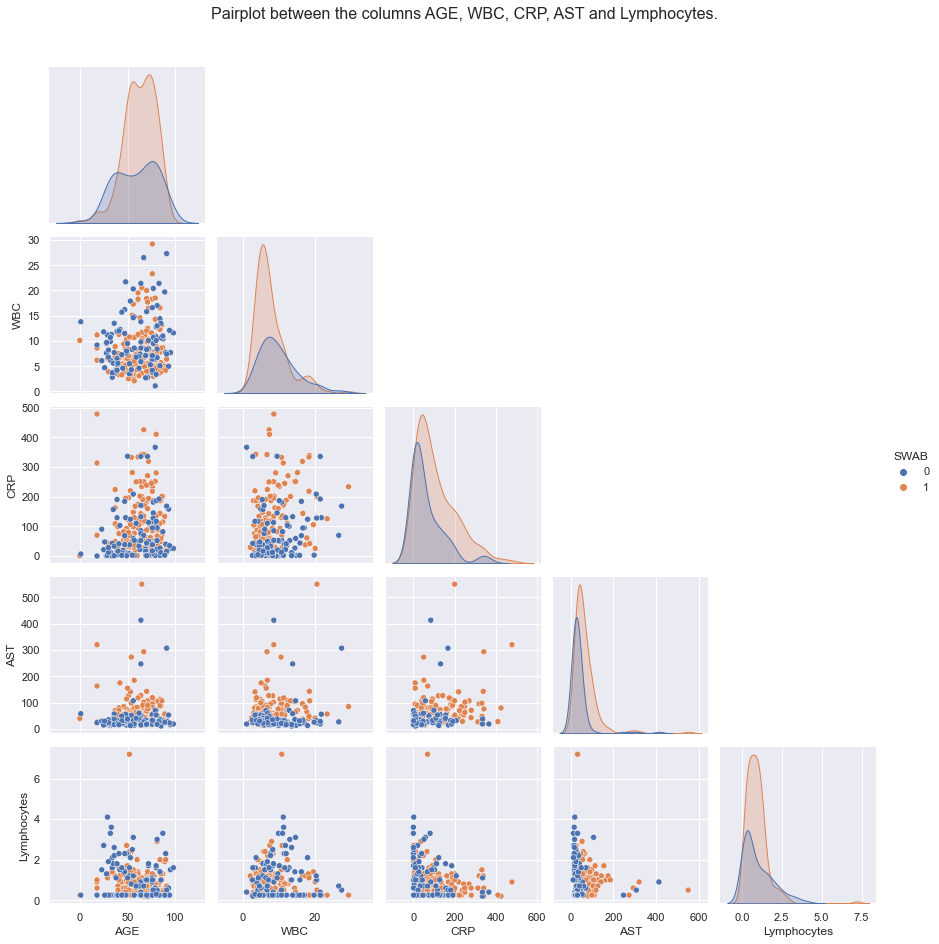

In [15]:
col_pair = ['AGE', 'WBC', 'CRP', 'AST', 'Lymphocytes']
fig_plot = sns.pairplot(data=data, vars=col_pair, hue='SWAB', corner=True)
fig_plot.fig.suptitle('Pairplot between the columns AGE, WBC, CRP, AST and Lymphocytes.', y=1.05, fontsize=16)
plt.show()

# Task II: Crowd Annotations Processing [3 pts]
* You are given a dataset that comprises crowd annotations on tweets. The crowd-annotators rated each  tweet as for the emotional state of the tweeter (the author of the tweet). The texts are not shared due to confidentiality purposes, and you are asked to process just the codes of the crowd-annotators.
* You are given the following:
  * `_unit_id`: The ID of the row.
  * `_created_at`: Date of creation of the annotation.
  * `_golden`: Whether the row was used as a quiz question.
  * `_worker_id`, `_trust` and `_channel` to describe the annotator, her trustworthiness and her employer.
  * Also, `_country`, `_region`, and `_city` of the annotator.
  * Finally, `neutral` (whether no emotion exists) and a column with the main question the annotator was asked: `which_of_the_following_options_best_describe_the_emotional_state_of_the_tweeter_please_select_all_that_apply`. We will refer to this column as `emomain` for brevity.
* Find the data [here](https://drive.google.com/uc?id=16vNIHMFzH_Ya7rstqOrFO1juw2NwkIjL).

In [16]:
# Additional package import
from itertools import chain
import random
import re

In [17]:
# Reading the data. Parsing the _created_at column as date and rename the last column to 'emomain'
data2 = pd.read_csv('crowd_emotions.csv', parse_dates=['_created_at']).rename(columns={'which_of_the_following_options_best_describe_the_emotional_state_of_the_tweeter_please_select_all_that_apply':'emomain'})
data2.sample(5)

,_unit_id,_created_at,_golden,_channel,_trust,_worker_id,_country,_region,_city,neutral,emomain
8275,2844683273,2020-09-25 14:48:46,True,feca,0.7692,45599294,USA,NY,New York,0.0,4
5924,2811521954,2020-08-10 23:15:35,False,feca,1.0000,45190802,USA,FL,Miami,0.0,NaN
6703,2844681508,2020-09-25 14:51:07,False,feca,1.0000,45581596,USA,MD,Chevy Chase,0.0,1\n8
6248,2811522019,2020-08-10 23:15:02,False,feca,1.0000,45709177,USA,NaN,NaN,NaN,3
6619,2844681480,2020-09-25 14:49:47,False,feca,1.0000,45602918,USA,TX,Dallas,0.0,NaN


### A. 
Rows with `_golden == True` are used as quiz questions to measure the quality of particular annotators. 
1. Filter these out. 
2. Then, build a hierarchical index with the rest, using `_unit_id`, `_trust` and `_channel` as indices.

In [18]:
# Keeping only those rows where _golden == False
data2_filtered = data2[~data2._golden]

indexed_tweets = data2_filtered.set_index(['_unit_id', '_trust', '_channel'])  # Creating the hierarchical index
indexed_tweets = indexed_tweets.sort_index(level=['_unit_id', '_trust', '_channel'])  # Sorting 
indexed_tweets.head()

_created_at  _golden  _worker_id _country  \
_unit_id   _trust _channel                                                     
2777628331 0.8571 feca     2020-07-02 23:15:32    False    45440910      USA   
           1.0000 feca     2020-07-02 23:14:46    False    45699688      USA   
                  feca     2020-07-02 23:14:57    False    45369365      USA   
                  feca     2020-07-02 23:16:43    False    45598105      USA   
                  feca     2020-07-02 23:19:32    False    45541215      USA   

                           _region     _city  neutral emomain  
_unit_id   _trust _channel                                     
2777628331 0.8571 feca          FL     Miami      NaN       8  
           1.0000 feca          WA   Seattle      NaN       1  
                  feca          NY  New York      0.0     NaN  
                  feca          TX    Dallas      NaN       3  
                  feca          AZ   Phoenix      NaN       1

### B. 
1. How many annotations have both the `neutral` and the `emomain` column empty? 
2. How many annotations have both the `neutral` and the `emomain` column non-empty? 

The latter are problematic, because a tweet cannot be neutral and non-neutral at the same time. We will assume next that any tweet with a non-empty neutral value is neutral and we will ignore any assigned emotions. 

In [19]:
indexed_tweets.neutral.isna()


_unit_id    _trust  _channel
2777628331  0.8571  feca         True
            1.0000  feca         True
                    feca        False
                    feca         True
                    feca         True
                                ...  
2844682034  0.9000  feca        False
            1.0000  feca         True
2844682035  0.8571  feca         True
            0.9091  feca        False
            0.9375  feca         True
Name: neutral, Length: 3867, dtype: bool

In [20]:
print('Number of annotations with both \'neutral\' and \'emomain\' empty: {}'
      .format((indexed_tweets.neutral.isna()&indexed_tweets.emomain.isna()).sum()))
print('Number of annotations with both \'neutral\' and \'emomain\' non-empty: {}'
      .format(((~(indexed_tweets.neutral.isna())) &(~(indexed_tweets.emomain.isna()))).sum()))

Number of annotations with both 'neutral' and 'emomain' empty: 0
Number of annotations with both 'neutral' and 'emomain' non-empty: 74


### C.
When no emotion is assigned (`neutral` column non empty) assign "-1" to the `emomain`.
* Hint: Clone the dataframe and use `.loc` for the assignment.

In [21]:
new_data = indexed_tweets.copy()  # Cloning the dataframe
new_data.loc[~(new_data.neutral.isna()), 'emomain']=-1  # Assigning value -1 when 'neutral' is not NaN
new_data_copy = new_data.copy()  # For later investigations - Question F


### D.
Some raters have assigned multiple codes for a single tweet in `emomain`. For instance, "1\n2" means that both 1 and 2 are found for the respective tweet. Use only the first assigned code in all such cases.


In [22]:
# We will use regular expressions to find all such cases.
regex = '(\n\d)+'  # Note that there are 2 instances where 3 codes are given, so the regex needs to account for this.
regex = re.compile(regex)

# Note that new_data.emomain.dtype is 'Object' because we have some integers and some strings.
# Note that the whole column was initially a string and the -1's we added are the int's.
# We want to find strings of specific form, but in order to apply the regex and do so,
# we need to cast the whole column as str. Then apply the regex to find the (possibly empty)
# list containing the matches per row. The bool function shows whether the list is empty or not.
multiple_scores = new_data.emomain.apply(str).apply(func=regex.findall).apply(bool)

# First, from the rows with (at least) 2 scores, keep one. Do this inplace, as we already have new_data_copy
new_data.loc[multiple_scores, 'emomain'] = new_data.loc[multiple_scores, 'emomain'].apply(lambda x: x.split()[0])


### E.
Assume the following mapping to the current labels:
  * `1`: anger
  * `2`: interest
  * `3`: disinterest
  * `4`: fear
  * `5`: joy
  * `6`: love
  * `7`: optimism
  * `8`: pessimism
  * `9`: sadness
  * `10`: surprise 
  * `11`: trust  
  * `-1`: noemo

1. Map the codes in `emomain` with their respective string labels.
2. Plot their counts distribution with a barplot.

In [23]:
# Create a dictionary storing the emotion corresponding to each code
emotions = {-1:'noemo', 1:'anger', 2:'interest', 3:'disinterest', 4:'fear', 5:'joy',
             6:'love', 7:'optimism', 8:'pessimism', 9:'sadness', 10:'surprise', 11:'trust'}

# Transform the numerical codes into words using the dictionary
new_data.loc[:, 'emomain'] = new_data.loc[:, 'emomain'].apply(lambda x: emotions[int(x)])

In [24]:
# Create emotions1, storing the count of emotions under the 1st assumption of keeping only the first code.
emotions1 = pd.DataFrame(data= new_data.emomain.value_counts().reset_index())

# Rename its columns
emotions1.rename(columns={emotions1.columns[0]:'emotion', emotions1.columns[1]:'count'}, inplace=True)

# Add the 'Assumption' column, indicating that we operate under the 1s assumption
emotions1['Αssumption']=pd.Series([r'Using only the $1^{st}$ code' for i in range(len(emotions1))])
emotions1

,emotion,count,Αssumption
0,noemo,1098,Using only the $1^{st}$ code
1,anger,423,Using only the $1^{st}$ code
2,optimism,354,Using only the $1^{st}$ code
3,fear,352,Using only the $1^{st}$ code
4,disinterest,332,Using only the $1^{st}$ code
5,joy,261,Using only the $1^{st}$ code
6,pessimism,222,Using only the $1^{st}$ code
7,interest,218,Using only the $1^{st}$ code
8,sadness,217,Using only the $1^{st}$ code
9,surprise,140,Using only the $1^{st}$ code


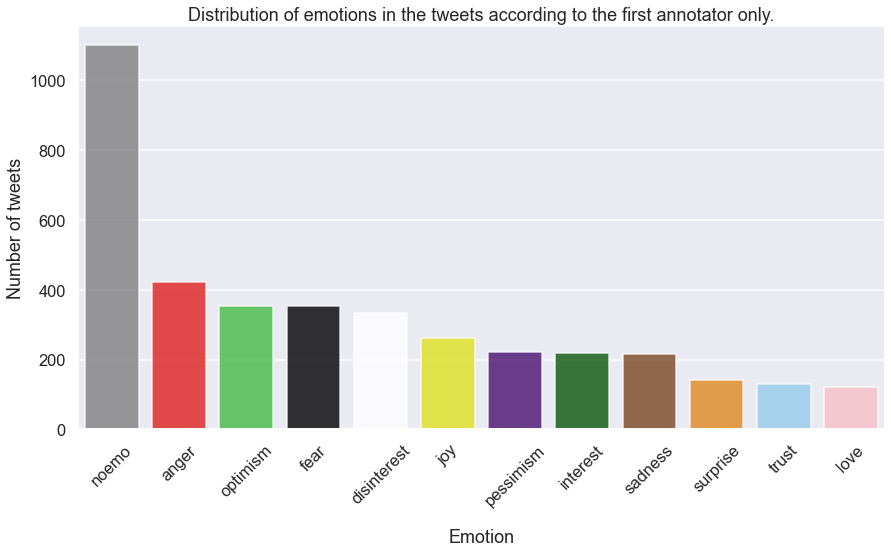

In [25]:
# Create a custom pallete for the plot. Colours were used to match the sentiment of the emotion.
colours = {'noemo':'gray', 'anger':'red', 'optimism':'limegreen', 'joy':'yellow', 'trust':'lightskyblue', 
           'love': 'lightpink', 'surprise':'darkorange', 'fear':'black','pessimism':'indigo', 'sadness':'saddlebrown',
          'disinterest':'white', 'interest':'darkgreen'}

# Plotting
sns.set_theme(style="darkgrid", context="talk")
fig3 = plt.figure(figsize=(16, 8))
axes3=fig3.add_axes([0.1, 0.1, 0.7, 0.7])

fig_plot = sns.barplot(x="emotion", y="count", data=emotions1, palette=colours, ax=axes3, alpha=0.8)
axes3.set_ylabel(ylabel='Number of tweets')
axes3.set_xlabel(xlabel='Emotion', labelpad=20)
fig_plot.set_xticklabels(labels=fig_plot.get_xticklabels(), rotation=45)
axes3.set_title('Distribution of emotions in the tweets according to the first annotator only.')
plt.show()

### F. 
1. Study whether we are missing valueable information by assigning only the first assigned code to all multi-codes (code with many codes within). Clone any dataframe rows (annotations) with multi-codes and assign a different code to each row (hint: You can use `.explode`).
2. Plot in bars the two distributions, one bar per emotion per assumption (1st code vs. all codes), in the same diagram, to seek for differences between the two.
3. Action: Choose the best way to proceed with multi-codes, based on your findings.

In [26]:
# We are using new_data_copy in which we have kept all codes.
new_data_copy.loc[multiple_scores, 'emomain'] = new_data_copy.loc[multiple_scores, 'emomain'].apply(lambda x: x.split())


In [27]:
new_data_copy = new_data_copy.explode('emomain')

In [28]:
# Follow the same procedure as before to get the emotion count under the second assumption
emotions2 = pd.DataFrame(data= new_data_copy.emomain.value_counts().reset_index())
emotions2.rename(columns={emotions2.columns[0]:'emotion', emotions2.columns[1]:'count'}, inplace=True)
emotions2['Αssumption']=pd.Series(['Using all the codes' for i in range(len(emotions2))])
emotions2.loc[:, 'emotion'] = emotions2.loc[:, 'emotion'].apply(lambda x: emotions[int(x)])
emotions2

,emotion,count,Αssumption
0,noemo,1098,Using all the codes
1,anger,423,Using all the codes
2,optimism,366,Using all the codes
3,fear,357,Using all the codes
4,disinterest,356,Using all the codes
5,joy,261,Using all the codes
6,sadness,237,Using all the codes
7,pessimism,228,Using all the codes
8,interest,218,Using all the codes
9,surprise,145,Using all the codes


In [29]:
# Combine the emotion1 and emotion2 to compare them
emotions_compared = emotions1.append(emotions2, ignore_index=True)

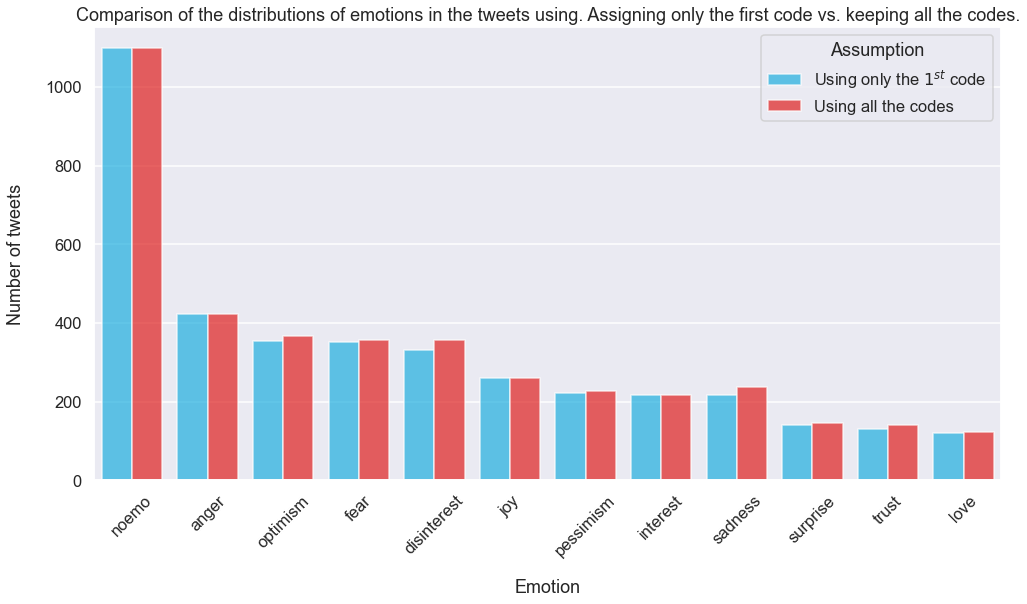

In [30]:
# Plot the compared distributions
fig4 = plt.figure(figsize=(14, 7))
axes4=fig4.add_axes([0.1, 0.1, 0.9, 0.9])
axes4.set_ylabel(ylabel='Number of tweets')
axes4.set_xlabel(xlabel='Emotion', labelpad=20)
fig_plot = sns.barplot(x='emotion', y='count', hue='Αssumption', 
                       palette={r'Using only the $1^{st}$ code':'deepskyblue','Using all the codes':'red'}, 
                       data=emotions_compared, ax=axes4, alpha=0.7)
fig_plot.set_xticklabels(labels=fig_plot.get_xticklabels(), rotation=45)
axes4.set_title('Comparison of the distributions of emotions in the tweets using. Assigning only the first code vs. keeping all the codes.')
axes4.set_ylabel(ylabel='Number of tweets', labelpad=20)
axes4.set_xlabel(xlabel='Emotion', labelpad=20)
plt.show()

Ultimately, we can observe that there is isn't any significant loss of information induced under the simplifying assumption of characterising tweets by the first code only. Thus, we proceed in this fashion.

### G.

1. Group the annotations per record. Use the `_unit_id` column to groupby. 
2. Measure the "impurity" of codes per record, defined as the number of distinct emotions out of the number of codes in the record (1 means that each coder has found a different emotion).
3. Print the 5 rows with the greatest impurity.
4. Draw a histogram of impurity. Discard any records with less than 4 annotations within and re-draw the histogram.

In [31]:
# impurities: number of unique emotions/number of annotations (per unit id)
impurities = new_data.groupby('_unit_id').nunique().emomain/new_data.groupby('_unit_id').count().emomain

In [32]:
# print 5 rows with greatest impurity
sorted_impurities = impurities.sort_values(ascending=False)
indices = sorted_impurities.index
for iRow in range(5):
    print('Row {}: Unit ID = {},   Impurity = {}'.format(iRow+1, indices[iRow],sorted_impurities.iloc[iRow]))

Row 1: Unit ID = 2844682035,   Impurity = 1.0
Row 2: Unit ID = 2844681727,   Impurity = 1.0
Row 3: Unit ID = 2844681717,   Impurity = 1.0
Row 4: Unit ID = 2844681718,   Impurity = 1.0
Row 5: Unit ID = 2844681719,   Impurity = 1.0


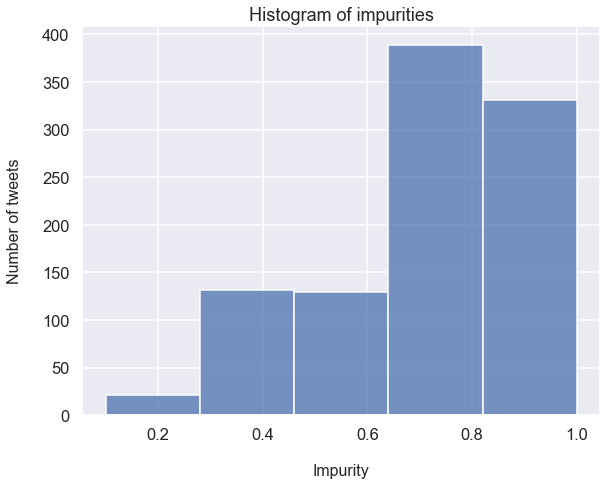

In [33]:
fig5 = plt.figure(figsize=(8, 6))
axes5=fig5.add_axes([0.1, 0.1, 0.9, 0.9])
axes5.set_ylabel(ylabel='Number of tweets', fontsize=16, labelpad=20)
axes5.set_xlabel(xlabel='Impurity', fontsize=16, labelpad=20)
fig_plot = sns.histplot(impurities, ax=axes5,bins=5)
axes5.set_title('Histogram of impurities')
plt.show()

In [34]:
# Filtering out records with less than 4 annotations
filtering = ~(new_data.groupby('_unit_id').count().emomain<4)  # creating a filter for each record
filtering = filtering.reset_index()  # reseting its index

# Keeping records only when the filter is True
filtered = new_data.loc[filtering[filtering.emomain]._unit_id]

# Create impurities distribution based on the filtered records
impurities2 =  filtered.groupby('_unit_id').nunique().emomain/filtered.groupby('_unit_id').count().emomain


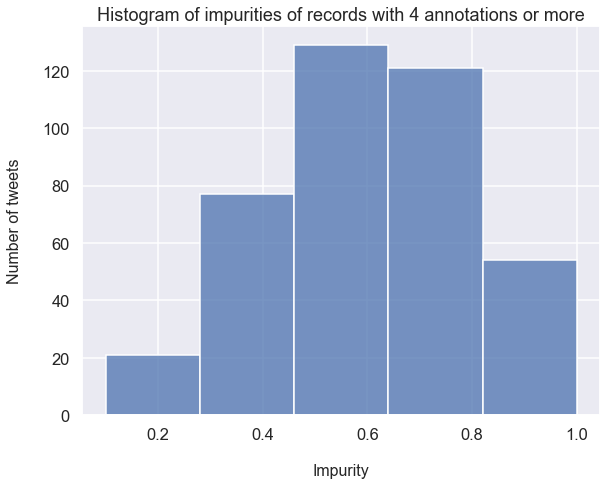

In [35]:
# Plotting 
fig6 = plt.figure(figsize=(8, 6))
axes6=fig6.add_axes([0.1, 0.1, 0.9, 0.9])
axes6.set_ylabel(ylabel='Number of tweets', fontsize=16, labelpad=20)
axes6.set_xlabel(xlabel='Impurity', fontsize=16, labelpad=20)
fig_plot = sns.histplot(impurities2, ax=axes6, bins=5)
axes6.set_title('Histogram of impurities of records with 4 annotations or more')
plt.show()

### H. 
Create the ground truth distribution, by keeping only rows for which there are 5 codes and impurity less than 60% (less than 3 distinct emotions in the record).

<p style='text-align: justify;'><strong> <u>Note:</u> </strong> We will slighlty modify the given restrictions. Specifically, instead of filtering for impmurities $<60\%$, we will filter for impurities $\leq 60\%$. The reason for this is that, because we have 5 codes/annotations, the definition of "impurity" allows it to take the discreet values [0.2, 0.4, 0.6, 0.8, 1.0]. Therefore, if we enforce impurity $<60\%$, it can only take the values [0.2, 0.4], which mean we can have only 1 or 2 distinct emotions. But in both these cases, the most frequent one will have the "absolute majority" <i>i.e.</i> percentage, and so ties will never occur. Also, in tha case, analyzing whether we are overestimating noemo's in the sequel would be trivial, since, all noemo's that would appear in our investigations would have the absolute majority within their respective _unit_id's. $>50\%$</p>

In [36]:
# Rows with 5 codes and impurity les than 60%
filter2 = (new_data.groupby('_unit_id').count().emomain==5)&(impurities<=0.6) 
filter2 = filter2[filter2].index  # Selecting the indices - _unit_id's for which the filter is True

# Selecting only the rows from those _unit_id's. Note that in 'new_data' we are operating under
# the assumption of using only the first code for each annotation.
new_data.loc[filter2]

_created_at  _golden  _worker_id _country  \
_unit_id   _trust _channel                                                     
2777628332 0.7368 feca     2020-07-02 23:14:33    False    45617911      USA   
           0.8333 feca     2020-07-02 23:20:10    False    45657507      USA   
           0.9091 feca     2020-07-02 23:14:24    False    45712300      USA   
           1.0000 feca     2020-07-02 23:15:24    False    45598398      USA   
                  feca     2020-07-02 23:16:56    False    45665770      USA   
...                                        ...      ...         ...      ...   
2811522028 0.8750 feca     2020-08-10 23:13:59    False    45710586      USA   
           0.9167 feca     2020-08-10 23:14:19    False    45432844      USA   
           1.0000 feca     2020-08-10 23:13:38    False    45769617      USA   
                  feca     2020-08-10 23:13:59    False    45600912      USA   
                  feca     2020-08-10 23:17:08    False    45975954      USA   

                           _region         _city  neutral emomain  
_unit_id   _trust _channel                                         
2777628332 0.7368 feca          FL  Apollo Beach      NaN   anger  
           0.8333 feca          NY      New York      NaN   anger  
           0.9091 feca          NY      New York      0.0   noemo  
           1.0000 feca          NY      New York      NaN    fear  
                  feca          IL       Chicago      NaN    fear  
...                            ...           ...      ...     ...  
2811522028 0.8750 feca          TX        Dallas      0.0   noemo  
           0.9167 feca          AZ       Phoenix      0.0   noemo  
           1.0000 feca          FL         Miami      0.0   noemo  
                  feca          TX        Dallas      NaN    fear  
                  feca          IL       Chicago      NaN    fear  

[1010 rows x 8 columns]

In [37]:
# Out of the filtered data, create the ground truth distribution.
ground_truth = new_data.loc[filter2].groupby('_unit_id').emomain.value_counts()  # count emotions
ground_truth = pd.DataFrame(ground_truth)  #transform the above series to dataframe for manipulation
ground_truth.rename(columns={'emomain':'count_emo'},inplace=True) #rename its column
maxes = ground_truth.groupby('_unit_id').max()  # maximum occurences of any emotions per user id

# Adding a test column. For each entry, store whether it's equal to maximum
ground_truth['test'] = None
for i,j in ground_truth.index:
    ground_truth.loc[(i,j),'test']=bool(ground_truth.loc[(i,j),'count_emo']==maxes.loc[i][0])

ground_truth

count_emo   test
_unit_id   emomain                      
2777628332 anger                2   True
           fear                 2   True
           noemo                1  False
2777628333 interest             2   True
           noemo                2   True
...                           ...    ...
2811522023 fear                 3   True
           anger                1  False
           disinterest          1  False
2811522028 noemo                3   True
           fear                 2  False

[508 rows x 2 columns]

In [38]:
# For each unit id, find all emotions that appear the maximum number of times
# Store this information in a dictionary.

gr_dict = {}
for i,j in ground_truth.index:
    if ground_truth.loc[(i,j),'test']:
        try:
            gr_dict[i].append(j)
        except KeyError:
            gr_dict[i]=[j]

In [39]:
gr_dict_full = gr_dict.copy()
# resolve ties. For each id, check the corresponding list of emotions. If there are more than 1, choose 1 randomly.
for iD in gr_dict.keys():
    if len(gr_dict[iD])>1:
        gr_dict[iD]=[random.choice(gr_dict[iD])]

In [40]:
# Create an array containing the assigned emotions per user id following the procedure above
arr = np.array(list(chain(*gr_dict.values())))

In [41]:
# Creating a dataframe out of this list to find the distribution
gr_distr = pd.DataFrame(arr)
# count values to find distribution and rename column
gr_distr = pd.DataFrame(gr_distr.value_counts(),columns=['count'])
# reseting index and renaming column
gr_distr = gr_distr.reset_index().rename(columns={0:'emotion'})
gr_distr

,emotion,count
0,noemo,81
1,anger,27
2,optimism,24
3,fear,22
4,pessimism,10
5,joy,9
6,disinterest,8
7,sadness,6
8,surprise,5
9,love,4


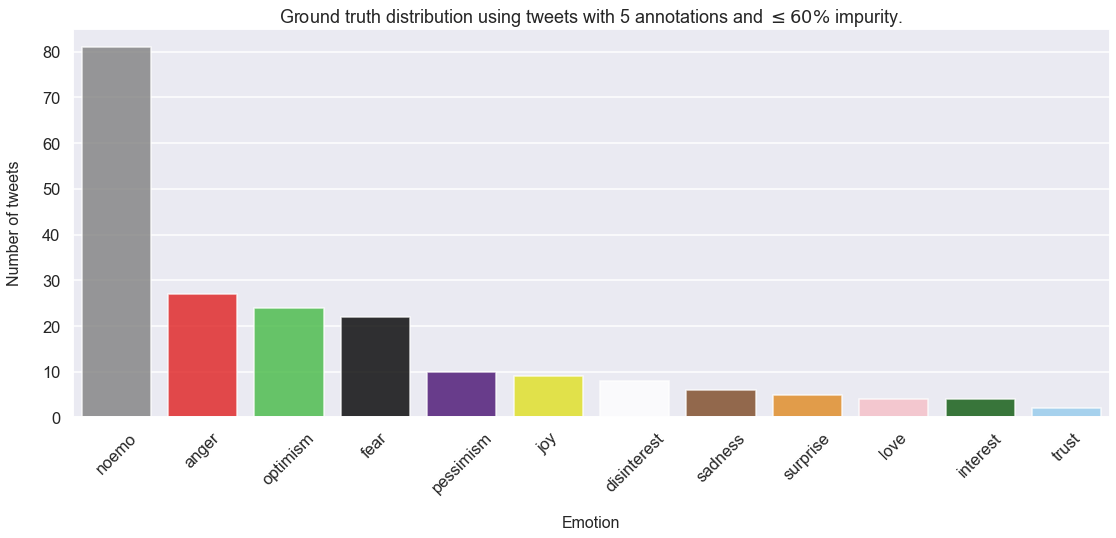

In [42]:
# Plot the ground truth distribution
fig7 = plt.figure(figsize=(16, 6))
axes7=fig7.add_axes([0.1, 0.1, 0.9, 0.9])
fig_plot = sns.barplot(x='emotion', y='count', data=gr_distr,  palette=colours, ax=axes7, alpha=0.8)
axes7.set_ylabel(ylabel='Number of tweets', fontsize=16, labelpad=20)
axes7.set_xlabel(xlabel='Emotion', fontsize=16, labelpad=20)
fig_plot.set_xticklabels(labels=fig_plot.get_xticklabels(), rotation=45)
axes7.set_title(r'Ground truth distribution using tweets with 5 annotations and $\leq60\%$ impurity.')
plt.show()

### I.
Explore whether we are overestimating the number of records with no-emotion. Consider for instance the case of `[none, none, 1,2,3]`, where we would assign `none`. 
1. Build a new column named `subjective`, which will contain the percentage of `none` codes per record and plot a histogram.
2. Binarize the `subjective` column and report the new fraction of `none`.

In [43]:
# We will use the same filtering of Question H to keep rows with 5 codes and impurity <=60%.
new_data.loc[filter2]  

_created_at  _golden  _worker_id _country  \
_unit_id   _trust _channel                                                     
2777628332 0.7368 feca     2020-07-02 23:14:33    False    45617911      USA   
           0.8333 feca     2020-07-02 23:20:10    False    45657507      USA   
           0.9091 feca     2020-07-02 23:14:24    False    45712300      USA   
           1.0000 feca     2020-07-02 23:15:24    False    45598398      USA   
                  feca     2020-07-02 23:16:56    False    45665770      USA   
...                                        ...      ...         ...      ...   
2811522028 0.8750 feca     2020-08-10 23:13:59    False    45710586      USA   
           0.9167 feca     2020-08-10 23:14:19    False    45432844      USA   
           1.0000 feca     2020-08-10 23:13:38    False    45769617      USA   
                  feca     2020-08-10 23:13:59    False    45600912      USA   
                  feca     2020-08-10 23:17:08    False    45975954      USA   

                           _region         _city  neutral emomain  
_unit_id   _trust _channel                                         
2777628332 0.7368 feca          FL  Apollo Beach      NaN   anger  
           0.8333 feca          NY      New York      NaN   anger  
           0.9091 feca          NY      New York      0.0   noemo  
           1.0000 feca          NY      New York      NaN    fear  
                  feca          IL       Chicago      NaN    fear  
...                            ...           ...      ...     ...  
2811522028 0.8750 feca          TX        Dallas      0.0   noemo  
           0.9167 feca          AZ       Phoenix      0.0   noemo  
           1.0000 feca          FL         Miami      0.0   noemo  
                  feca          TX        Dallas      NaN    fear  
                  feca          IL       Chicago      NaN    fear  

[1010 rows x 8 columns]

In [44]:
subjective = 100*(new_data.loc[filter2].emomain=='noemo').groupby('_unit_id').sum()/5

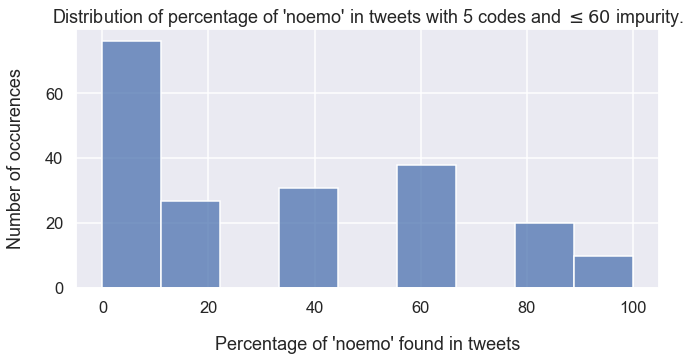

In [45]:
# Plotting 'subjective'
fig8 = plt.figure(figsize=(9, 4))
axes8=fig8.add_axes([0.1, 0.1, 0.9, 0.9])
fig_plot = sns.histplot(subjective, ax=axes8)
axes8.set_xlabel(xlabel='Percentage of \'noemo\' found in tweets', labelpad=20)
axes8.set_ylabel(ylabel='Number of occurences', labelpad=20)
axes8.set_title(r"""Distribution of percentage of 'noemo' in tweets with 5 codes and $\leq 60%$ impurity.""" )
plt.show()

In [46]:
# Binarization of 'subjective' with threshold 50%. Percentages up to and including 50% are mapped to 0, the rest to 1. 
binarized_noemo = subjective.apply(lambda x: int(max([0, np.sign(x-50)])))
binarized_noemo

_unit_id
2777628332    0
2777628333    0
2777628334    0
2777628335    1
2777628337    0
             ..
2811522016    0
2811522017    1
2811522022    0
2811522023    0
2811522028    1
Name: emomain, Length: 202, dtype: int64

<p style='text-align: justify;'>We will now compare the percentages of 'noemo' of the binarized and unbinarized data. Because of the restrictions of our filtering, <i>i.e.</i> to have exactly 5 codes and impurity $\leq 60\%$, We can have 1, 2 or 3 distinct emotions in the tweets we study as ground truth. If we have 1 or 2, then if 'noemo' was the most frequent, it had the "absolute majority", so we don't consider this to count towards overestimation. However, if we have 3 distinct emotions, then we could have the case (as an example) ['noemo', 'noemo', 'anger', 'anger', 'fear'], in which case the two most frequent ones are 'noemo' and 'fear'. In this case, because of the random selection, we could choose 'noemo' and this could be considered as overestimating their tru numbers. Thus, we will distinguish between the cases where 'noemo' is indeed the absolute majority and where  it is not and study the difference between the 2.</p>
<p style='text-align: justify;'>For the first case, 'gr_dist_full' contains the most frequent emotions per tweet, where we have <i>not</i> resolved the ties yet. So, if 'noemo' the dominant emotion there, we know it is unique. We proceed to count them.</p>

In [47]:
count = 0
for i in gr_dict_full:
    if gr_dict_full[i]==['noemo']:
        count += 1
        
# Total number of tweets filtered
tot_filt = gr_distr['count'].sum()
print('Cases where \'noemo\' is the most dominant - more than 50% of the codes: {}. Perentage = {:.2f}%'
                                                                                  .format(count, 100*count/tot_filt))
print('Total cases of \'noemo\' after resolving ties: {}. Percentage = {:.2f}%'
                                            .format(gr_distr[gr_distr['emotion']=='noemo']['count'][0],
                                                    100*gr_distr[gr_distr['emotion']=='noemo']['count'][0]/tot_filt))

Cases where 'noemo' is the most dominant - more than 50% of the codes: 68. Perentage = 33.66%
Total cases of 'noemo' after resolving ties: 81. Percentage = 40.10%


<p style='text-align: justify;'>As we can see, using the  above restrictions, we do overestimate the true numbers of truly 'noemo' cases. This overstimation, as was explained, comes from cases where 'noemo' was tied with some other emotion and the tie was randomly resolved in favor of 'noemo'. Therefore, the exact overestimation is random, however it should be of the order of 40-33.4 $\approx$ 6-7 percentage points. However, this can be considered as significant, as 7 percentage points account for $100\times \frac{7}{33.66}\% \approx 21\%$ of the case where 'noemo' is indeed dominant. Which means that, on average, we 'boost' their number by $\approx 21\%$. Now, if we considered relaxing the restrictions to include impurities $\leq 80\%$, $\textit{i.e.}$ include examples such as ['noemo', 'noemo',  'fear', 'anger', 'love'], then the overstimation is even more pronounced, being almost 2 times greater, since all the 'would-have-been' ties of the pprevious case are now assigned 'noemo' and in the ties this happens arround $50\%$ of the times. However, it is highly questionable if we can still speak of some "ground truth" using data with impurity up to $80\%$ and so we refrain from doing so.</p>

# Task III Predict the number of COVID19 deaths in Berlin [4 pts]

* Predict the number of deaths in Berlin, Germany. Predict the number of deaths on 2020-03-23, using only the information of the number of deaths from 2020-03-1 to 2020-03-15. Repeat this process to predict the number of deaths on 2020-03-24 (using data from 2020-03-2 to 2020-03-16) and so on until you predict the number of deaths on 2020-04-21. Plot the predicted and the true number of deaths per date.
  * Find the data [here](https://www.kaggle.com/headsortails/covid19-tracking-germany) (use the covid_de.csv file). 

In [48]:
### ===== Importing additional packages ===== ###
### ----------------------------------------- ###

import statsmodels.api as sm
from datetime import datetime
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")
import itertools
from statsmodels.tsa.statespace import sarimax
from pandas.plotting import autocorrelation_plot


In [49]:
# Read the data, parsing the dates as the appropriate type, and extract a sample
covid_data = pd.read_csv('covid_de.csv', parse_dates=['date'] )
covid_data.sample(5)

,state,county,age_group,gender,date,cases,deaths,recovered
204031,Nordrhein-Westfalen,SK Duisburg,05-14,F,2020-11-08,6,0,0
112281,Brandenburg,LK Dahme-Spreewald,15-34,M,2020-11-04,2,0,2
34323,Baden-Wuerttemberg,SK Mannheim,05-14,F,2020-11-08,1,0,0
81689,Bayern,LK Weilheim-Schongau,35-59,F,2020-03-19,1,0,1
102929,Berlin,SK Berlin Mitte,15-34,F,2020-04-01,4,0,4


In [50]:
covid_data.describe()

,cases,deaths,recovered
count,273007.000000,273007.000000,273007.000000
mean,3.305146,0.050856,2.171849
std,5.425420,0.280159,3.526859
min,0.000000,0.000000,-1.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000
75%,3.000000,0.000000,2.000000
max,206.000000,11.000000,206.000000


In [51]:
# Number of missing values in columns we will work on
covid_data.loc[:,['date','deaths']].isna().sum()

date      0
deaths    0
dtype: int64

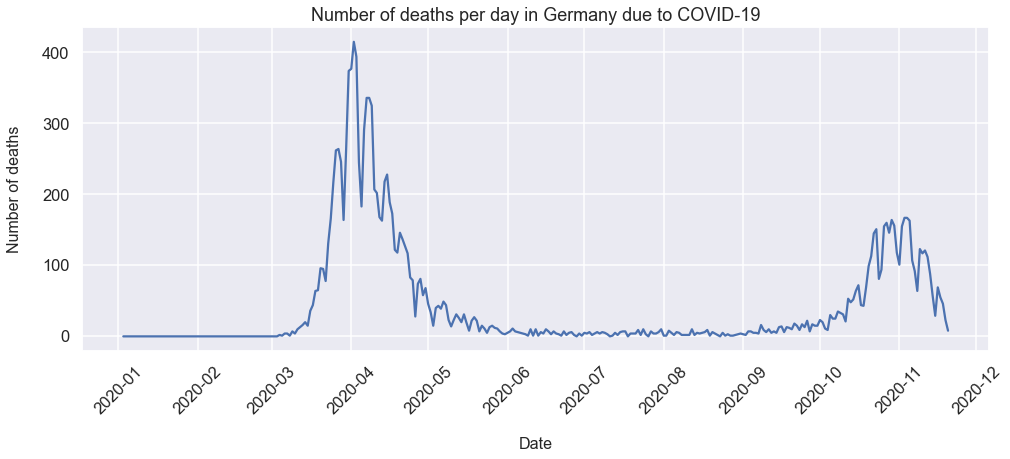

In [52]:
# Extract the time series. Sum all the deaths in Germany per date
time_covid = pd.DataFrame(covid_data.groupby('date').sum().deaths)

# Visualize the data
fig9 = plt.figure(figsize=(14, 5))
axes9=fig9.add_axes([0.1, 0.1, 0.9, 0.9])
axes9.plot(time_covid.index, time_covid.deaths)
axes9.set_xlabel(xlabel='Date', fontsize=16, labelpad=20)
axes9.set_ylabel(ylabel='Number of deaths', fontsize=16, labelpad=20)
axes9.set_title('Number of deaths per day in Germany due to COVID-19')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Extract a sample from the time series
time_covid.sample(5)

,deaths
date,
2020-07-21,4
2020-08-02,1
2020-07-22,9
2020-05-15,31
2020-10-27,160


### Model order selection

<p style='text-align: justify;'>We will now select the appropriate model and its parameters. To begin with, we opt for an ARIMA type model. We seek to perform Autoregression on a non-stationary (judging from the plot) time series. ARIMA performs this by automatically performing differencing <i>i.e.</i> taking the difference of the time series with a shifted copy of its self to make the result stationary. We will employ the more powerful package SARIMAX, which includes ARIMA, if we eliminate the seasonal contributions. We have found (see, e.g. [$\href{https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average#Choosing_the_order}{1}$, $\href{https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b}{2}$] ) that, in order to select the ARIMA parameter models, we can rely on the so-called  Akaike information criterion (AIC) or  Bayesian Information Criterion (BIC). These are complementary approaches, but each is optimal at the set of parameters where it achieves its minimum. We perform a grid search and print the results</p>

In [54]:
### ===== Model order selection ===== ###
### --------------------------------- ###

sm.tsa.ExponentialSmoothing

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
for param in pdq:
    mod = sarimax.SARIMAX(time_covid,
                          order=param)
    results = mod.fit()
    print('ARIMA parameters{}. AIC = {:.2f},    BIC  = {:.2f}'.format(param, results.aic, results.bic))

ARIMA parameters(0, 0, 0). AIC = 3384.72,    BIC  = 3388.37
ARIMA parameters(0, 0, 1). AIC = 3052.68,    BIC  = 3059.98
ARIMA parameters(0, 0, 2). AIC = 2880.37,    BIC  = 2891.32
ARIMA parameters(0, 1, 0). AIC = 2582.19,    BIC  = 2585.83
ARIMA parameters(0, 1, 1). AIC = 2574.04,    BIC  = 2581.34
ARIMA parameters(0, 1, 2). AIC = 2555.24,    BIC  = 2566.17
ARIMA parameters(0, 2, 0). AIC = 2726.59,    BIC  = 2730.23
ARIMA parameters(0, 2, 1). AIC = 2581.71,    BIC  = 2589.00
ARIMA parameters(0, 2, 2). AIC = 2573.17,    BIC  = 2584.09
ARIMA parameters(1, 0, 0). AIC = 2590.71,    BIC  = 2598.00
ARIMA parameters(1, 0, 1). AIC = 2580.35,    BIC  = 2591.30
ARIMA parameters(1, 0, 2). AIC = 2565.46,    BIC  = 2580.06
ARIMA parameters(1, 1, 0). AIC = 2578.56,    BIC  = 2585.85
ARIMA parameters(1, 1, 1). AIC = 2564.50,    BIC  = 2575.43
ARIMA parameters(1, 1, 2). AIC = 2555.67,    BIC  = 2570.25
ARIMA parameters(1, 2, 0). AIC = 2704.72,    BIC  = 2712.00
ARIMA parameters(1, 2, 1). AIC = 2577.80

<p style='text-align: justify;'>As was mentioned, AIC and BIC are complementary, but it so happens that in this case they are both minimized at $(p,\ q,\ d)=(2,\ 1,\ 2)$, $\textit{i.e}$ 2 days lag for the autoregression, $1^{\text{st}}$ order differencing to make the series stationary and $2^{\text{nd}}$ order moving average model. Notice that, we employed the whole dataset to choose the best fit overall. For these parameters, we will iteratively fit models with different training periods and makes predictions.</p>
<p style='text-align: justify;'>We are using 14-day intervals for the fitting of the predictor and then extrapolating 8 days in the future. Thus, the last day we will use to fit the predictor is 2020-04-13 and the corresponding interval 2020-03-30 to 2020-04-13. We first find the index locations of the starting days of the first and last intervals. We have:</p>

In [55]:
print('Index of the starting day of 1st  interval: {}'.format(np.where(time_covid.index=='2020-03-01')[0][0]))
print('Index of the starting day of last interval: {}'.format(np.where(time_covid.index=='2020-03-30')[0][0]))

Index of the starting day of 1st  interval: 19
Index of the starting day of last interval: 48


In [56]:
predictions = []
lower_bounds = []
upper_bounds = []
for iStartingDay in range(19,49):
    mod = sarimax.SARIMAX(time_covid.iloc[iStartingDay:iStartingDay+15],order=(2, 1, 2))  # Use +15 to reach +14 later
                                                                                          # due to iloc functionality
    results = mod.fit()  # fit the model with the given 14 day data
    predictions.append(results.get_forecast(8)._predicted_mean[-1])  # get the mean prediction - point estimate.
    
    # get lower bound of the 95% confidence interval. Obviously, when this is <0, set 0 instead.
    lower_bounds.append(max([0, results.get_forecast(8).summary_frame().iloc[-1]['mean_ci_lower']]))  
    upper_bounds.append(results.get_forecast(8).summary_frame().iloc[-1]['mean_ci_upper'])  # get upper bound

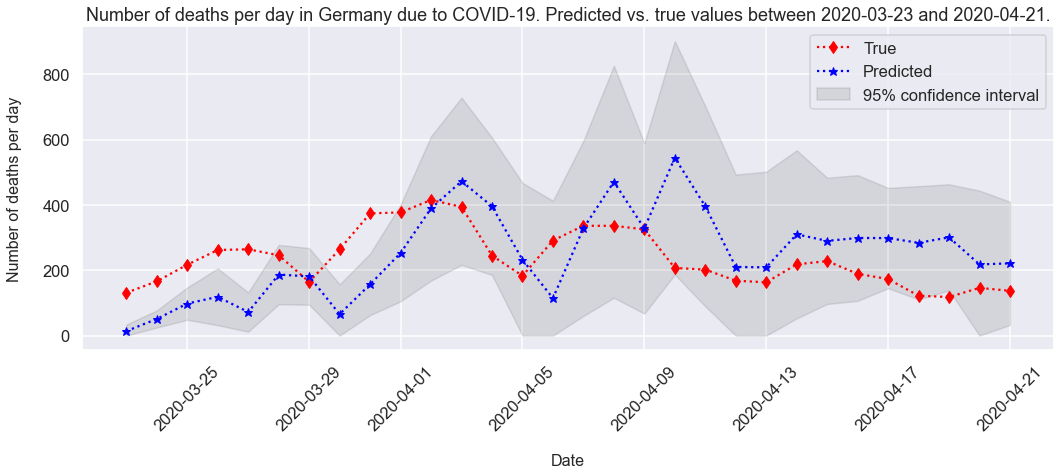

In [57]:
fig10 = plt.figure(figsize=(15, 5))
axes10=fig10.add_axes([0.1, 0.1, 0.9, 0.9])
axes10.plot(time_covid.index[41:71], time_covid.deaths[41:71],label='True', c='red', marker="d", ls='dotted')
axes10.plot(time_covid.index[41:71], predictions,label='Predicted',c='blue', marker="*", ls='dotted')
axes10.set_title('Number of deaths per day in Germany due to COVID-19. Predicted vs. true values between 2020-03-23 and 2020-04-21.')
axes10.set_xlabel(xlabel='Date', fontsize=16, labelpad=20)
axes10.set_ylabel(ylabel='Number of deaths per day', fontsize=16, labelpad=20)
axes10.fill_between(time_covid.index[41:71], lower_bounds, upper_bounds, color='k', alpha=0.1, label='95% confidence interval')
axes10.legend()
plt.xticks(rotation=45)
plt.show()